# K Nearest Neighbors (KNN)

Ejemplo de regresión con KNN utilizando el estimador KNeighborsRegressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

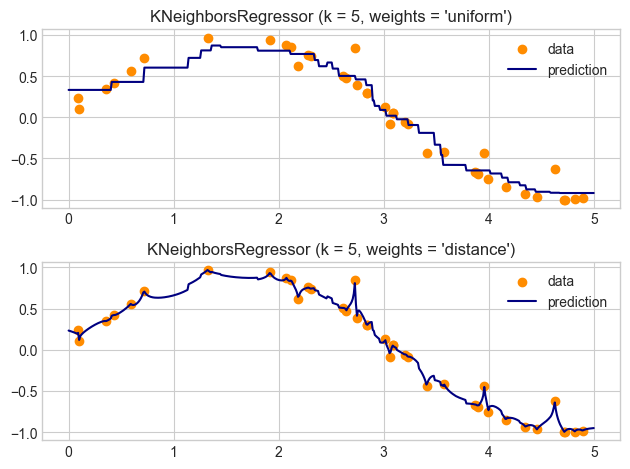

In [3]:
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
#plt.rcParams["figure.figsize"] = (20, 3)
plt.show()

## Dataset penguins

Regresión: Predecir la variable body_mass_g

In [4]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df.shape

(344, 7)

In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [9]:
X = pd.get_dummies(df.drop('body_mass_g', axis=1), drop_first=True)
X[:10]

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,0,0,0,1,1
1,39.5,17.4,186.0,0,0,0,1,0
2,40.3,18.0,195.0,0,0,0,1,0
4,36.7,19.3,193.0,0,0,0,1,0
5,39.3,20.6,190.0,0,0,0,1,1
6,38.9,17.8,181.0,0,0,0,1,0
7,39.2,19.6,195.0,0,0,0,1,1
12,41.1,17.6,182.0,0,0,0,1,0
13,38.6,21.2,191.0,0,0,0,1,1
14,34.6,21.1,198.0,0,0,0,1,1


In [10]:
y = df['body_mass_g']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
model.score(X_test, y_test)

0.8495134616158182

In [14]:
print(mean_absolute_error(y_test, y_pred))

239.8507462686567


In [15]:
def plot_complexity_curve(k_list, knn_model, x_train, x_test, y_train, y_test):
    train_scores = []
    test_scores = []

    # For each k
    for k in k_list:
        # Initialize, fit, predict
        knn = knn_model(k)

        knn.fit(x_train, y_train)

        train_scores.append(knn.score(x_train, y_train))
        test_scores.append(knn.score(x_test, y_test))

    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(k_list, train_scores, label='Training Accuracy', color='red')
    ax.plot(k_list, test_scores, label='Testing Accuracy', color='black')

    ax.set(title='k-NN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='R^2')

    ax.legend()

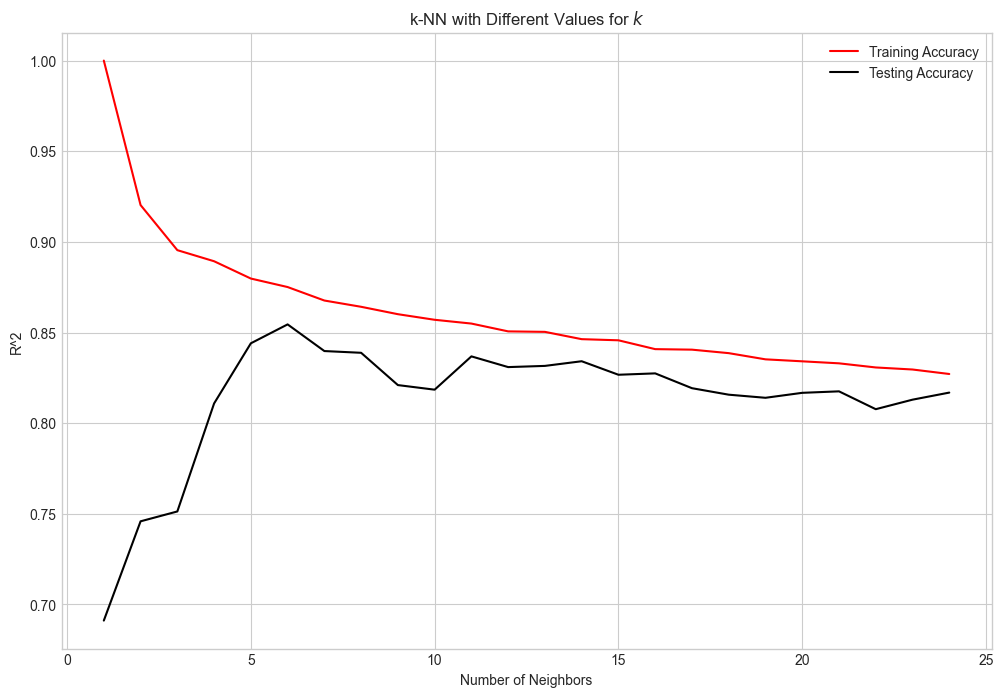

In [16]:
# Create possible values for k
neighbors = np.arange(1, 25)

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=42)

plot_complexity_curve(neighbors, KNeighborsRegressor, X_train, X_test, y_train, y_test)

In [17]:
model = KNeighborsRegressor(n_neighbors=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8544778434482254

In [18]:
r2 = r2_score(y_test, y_pred)
r2

0.8544778434482254

In [19]:
mean_absolute_error(y_test, y_pred)

195.50000000000009

## Escalado

In [20]:
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [21]:
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [22]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [23]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [24]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [25]:
X = df.drop('body_mass_g', axis=1)
y = df['body_mass_g']

In [26]:
# Select and extract categorical cols
categorical_cols = X.select_dtypes(include=object).columns
X_cat = X[categorical_cols]
X_cat

,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
4,Adelie,Torgersen,Female
5,Adelie,Torgersen,Male
...,...,...,...
338,Gentoo,Biscoe,Female
340,Gentoo,Biscoe,Female
341,Gentoo,Biscoe,Male
342,Gentoo,Biscoe,Female


In [27]:
# Select and extract numerical cols
numerical_cols = X.select_dtypes(include='number').columns
X_num = X[numerical_cols]
X_num

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0
...,...,...,...
338,47.2,13.7,214.0
340,46.8,14.3,215.0
341,50.4,15.7,222.0
342,45.2,14.8,212.0


In [28]:
from sklearn.preprocessing import MinMaxScaler

# Scale numeric features
scaler = MinMaxScaler()

X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num))

# Scaler removes the column names, so put them back
X_num_scaled.columns = X_num.columns
X_num_scaled.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,0.254545,0.666667,0.152542
1,0.269091,0.511905,0.237288
2,0.298182,0.583333,0.389831
3,0.167273,0.738095,0.355932
4,0.261818,0.892857,0.305085


In [29]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
for cat_col in X_cat.columns:
    # Apply the encoder
    X_cat[cat_col] = l_encoder.fit_transform(X_cat[cat_col])

X_cat.head()

C:\Users\alanj\AppData\Local\Temp\ipykernel_25384\1357631040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat[cat_col] = l_encoder.fit_transform(X_cat[cat_col])


,species,island,sex
0,0,2,1
1,0,2,0
2,0,2,0
4,0,2,0
5,0,2,1


In [30]:
X_ready = pd.concat([X_num_scaled, X_cat], axis=1)
X_ready.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species,island,sex
0,0.254545,0.666667,0.152542,0.0,2.0,1.0
1,0.269091,0.511905,0.237288,0.0,2.0,0.0
2,0.298182,0.583333,0.389831,0.0,2.0,0.0
3,0.167273,0.738095,0.355932,NaN,NaN,NaN
4,0.261818,0.892857,0.305085,0.0,2.0,0.0


In [31]:
X_ready = X_ready.dropna()

y = y.drop(y[~y.index.isin(X_ready.dropna().index)].index)

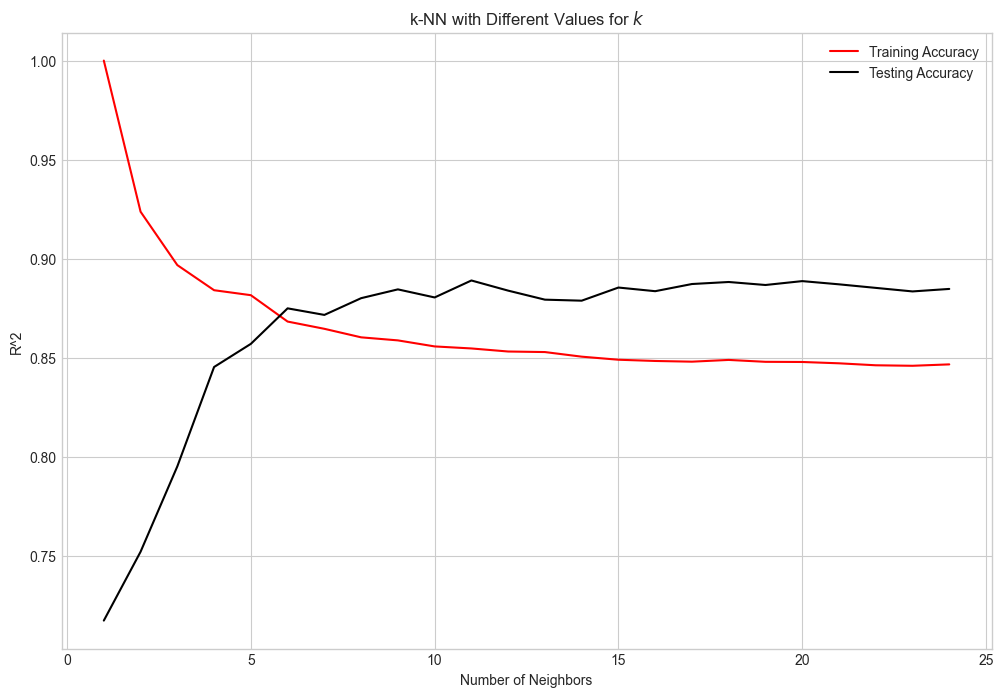

In [32]:
neighbors = np.arange(1, 25)

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ready, y, test_size=25, random_state=42)

plot_complexity_curve(neighbors, KNeighborsRegressor, X_train, X_test, y_train, y_test)

In [33]:
model = KNeighborsRegressor(n_neighbors=11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8890191910785327

In [34]:
mean_absolute_error(y_test, y_pred)

175.81818181818173

## Escalado (otra forma)

In [35]:
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [36]:
df.dropna(inplace=True)
X = pd.get_dummies(df.drop('body_mass_g', axis=1), drop_first=True)
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,0,0,0,1,1
1,39.5,17.4,186.0,0,0,0,1,0
2,40.3,18.0,195.0,0,0,0,1,0
4,36.7,19.3,193.0,0,0,0,1,0
5,39.3,20.6,190.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,0,1,0,0,0
340,46.8,14.3,215.0,0,1,0,0,0
341,50.4,15.7,222.0,0,1,0,0,1
342,45.2,14.8,212.0,0,1,0,0,0


In [37]:
y = df['body_mass_g']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)

In [39]:
model = KNeighborsRegressor(n_neighbors=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8238405116507892
207.0833333333334


**StandardScaler** se usa cuando las características del conjunto de datos de entrada difieren mucho entre sus rangos, o simplemente cuando se miden en diferentes unidades de medida.

Estandariza los datos: a cada feature le quita la media y (μ = 0, σ = 1)

En primer lugar, al restar la media, trae los valores alrededor de 0, por lo que tiene una media cero. En segundo lugar, divide los valores por la desviación estándar (varianza), lo que garantiza que la distribución resultante sea estándar con una media de 0 y una desviación estándar de 1.

In [40]:
from sklearn.preprocessing import RobustScaler, PowerTransformer
from parso.normalizer import Normalizer

# scaler = MinMaxScaler(feature_range=(1,2))
scaler = StandardScaler()
# scaler = RobustScaler() # Robusto ante outliers

scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# power = PowerTransformer(method='box-cox')
# power.fit(X_train_sc)
# X_train_sc = power.transform(X_train_sc)
# X_test_sc = power.transform(X_test_sc)

model = KNeighborsRegressor(n_neighbors=11)
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
#Check performance using accuracy
print(r2_score(y_test, y_pred))#Check performance using roc
print(mean_absolute_error(y_test, y_pred))

0.8551979456938411
173.5227272727273


array([[<AxesSubplot: title={'center': 'bill_length_mm'}>,
        <AxesSubplot: title={'center': 'bill_depth_mm'}>,
        <AxesSubplot: title={'center': 'flipper_length_mm'}>],
       [<AxesSubplot: title={'center': 'species_Chinstrap'}>,
        <AxesSubplot: title={'center': 'species_Gentoo'}>,
        <AxesSubplot: title={'center': 'island_Dream'}>],
       [<AxesSubplot: title={'center': 'island_Torgersen'}>,
        <AxesSubplot: title={'center': 'sex_Male'}>, <AxesSubplot: >]],
      dtype=object)

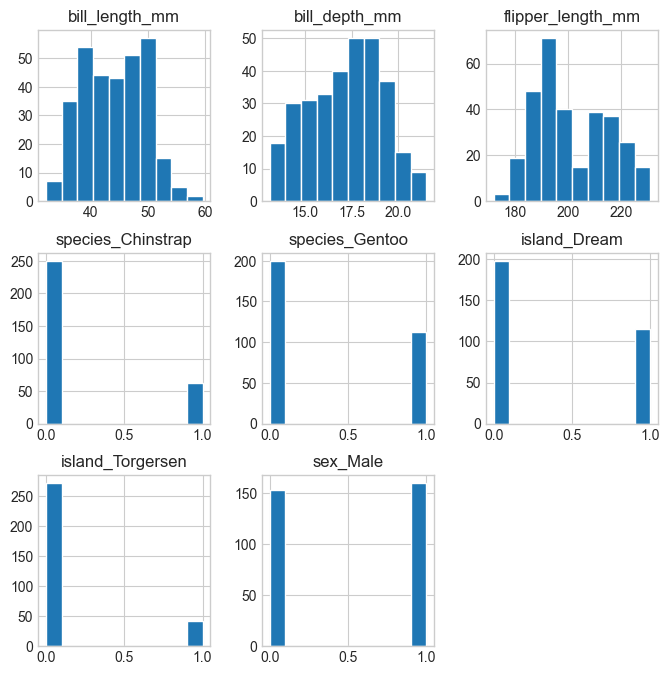

In [41]:
pd.DataFrame(X_train, columns=X.columns).hist(figsize=(8,8))

array([[<AxesSubplot: title={'center': 'bill_length_mm'}>,
        <AxesSubplot: title={'center': 'bill_depth_mm'}>,
        <AxesSubplot: title={'center': 'flipper_length_mm'}>],
       [<AxesSubplot: title={'center': 'species_Chinstrap'}>,
        <AxesSubplot: title={'center': 'species_Gentoo'}>,
        <AxesSubplot: title={'center': 'island_Dream'}>],
       [<AxesSubplot: title={'center': 'island_Torgersen'}>,
        <AxesSubplot: title={'center': 'sex_Male'}>, <AxesSubplot: >]],
      dtype=object)

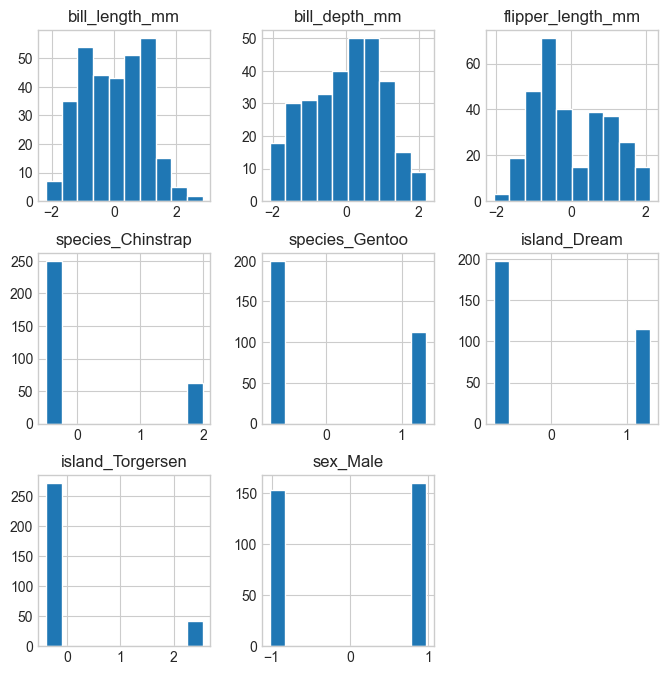

In [42]:
pd.DataFrame(X_train_sc, columns=X.columns).hist(figsize=(8,8))